<a href="https://colab.research.google.com/github/Rickmwasofficial/Animal_Image_Recognition/blob/main/Animal_Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using transfer Learning to create a model to identify different animals from a class of 90.

1. Getting the dataset from Kaggle - https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals?select=animals
2. Get familiar with the data. Use random to vie the data
3. Preprocessing the data - Use `tf.keras.preprocessing.image_dataset_from_directory`
4. Start Modelling

### 1. Getting the data and a helper function file

In [1]:
!wget https://raw.githubusercontent.com/Rickmwasofficial/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2024-08-21 20:16:37--  https://raw.githubusercontent.com/Rickmwasofficial/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-08-21 20:16:37 (22.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
!kaggle datasets download -d iamsouravbanerjee/animal-image-dataset-90-different-animals

Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals
License(s): other
 99% 649M/656M [00:10<00:00, 58.3MB/s]
100% 656M/656M [00:10<00:00, 68.3MB/s]


In [3]:
unzip_data('animal-image-dataset-90-different-animals.zip')

### 2. Getting familiar with the data

In [4]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [5]:
walk_through_dir('animals/animals')

There are 90 directories and 0 images in 'animals/animals'.
There are 0 directories and 60 images in 'animals/animals/okapi'.
There are 0 directories and 60 images in 'animals/animals/hornbill'.
There are 0 directories and 60 images in 'animals/animals/caterpillar'.
There are 0 directories and 60 images in 'animals/animals/turtle'.
There are 0 directories and 60 images in 'animals/animals/wolf'.
There are 0 directories and 60 images in 'animals/animals/ox'.
There are 0 directories and 60 images in 'animals/animals/horse'.
There are 0 directories and 60 images in 'animals/animals/seahorse'.
There are 0 directories and 60 images in 'animals/animals/whale'.
There are 0 directories and 60 images in 'animals/animals/tiger'.
There are 0 directories and 60 images in 'animals/animals/porcupine'.
There are 0 directories and 60 images in 'animals/animals/sparrow'.
There are 0 directories and 60 images in 'animals/animals/pigeon'.
There are 0 directories and 60 images in 'animals/animals/hyena'.


In [6]:
def view_random_image(dir):
  dir_path = os.path.join(dir, random.choice(os.listdir(dir)))
  animal = random.choice(os.listdir(dir_path))
  animal_path = os.path.join(dir_path, animal)
  img_path = os.path.join(animal_path, random.choice(os.listdir(animal_path)))
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(animal)
  plt.axis(False)
  plt.show()

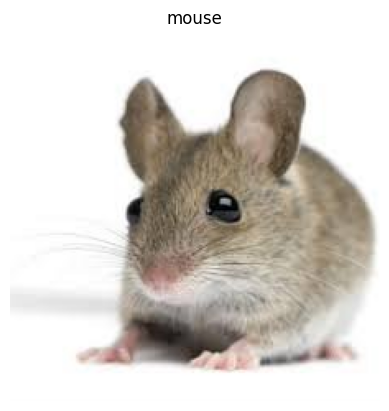

In [7]:
view_random_image('animals')

### 3. Preprocessing the data

Now that we are able to view the images, let's create a data pipeline that will pass the data to our model

In [8]:
import tensorflow as tf

IMG_SIZE = (224, 224)
SEED = 42
data_dir = '/content/animals/animals'
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    label_mode = 'categorical',
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = 8,
    subset = 'training'
)

valid_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    label_mode = 'categorical',
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = 8,
    subset = 'validation'
)

Found 5400 files belonging to 90 classes.
Using 4320 files for training.
Found 5400 files belonging to 90 classes.
Using 1080 files for validation.


In [9]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 90), dtype=tf.float32, name=None))>

In [10]:
len(valid_data.class_names), len(train_data.class_names)

(90, 90)

In [11]:
valid_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 90), dtype=tf.float32, name=None))>

In [12]:
image, label = next(iter(train_data))
print(image, label)

tf.Tensor(
[[[[ 32.581314   17.634886   10.695793 ]
   [122.04718    94.08704    82.2114   ]
   [ 70.49271    53.849842   35.671272 ]
   ...
   [200.42096   207.95853   245.45763  ]
   [186.87617   183.87617   230.87617  ]
   [175.36555   165.20474   215.11705  ]]

  [[ 87.49809    68.08674    54.22545  ]
   [ 50.14221    26.620844   10.5156145]
   [ 68.27072    45.00286    38.937492 ]
   ...
   [205.22943   218.13716   255.       ]
   [207.7713    205.89087   245.56934  ]
   [183.33817   180.33817   209.4097   ]]

  [[ 50.68654    38.311535   26.080349 ]
   [136.71909   109.16552    96.54371  ]
   [ 92.970314   73.613174   70.14888  ]
   ...
   [202.50276   204.92714   239.30212  ]
   [208.50931   201.59256   242.34279  ]
   [210.67747   204.67747   240.67747  ]]

  ...

  [[ 23.880476    9.880476    9.880476 ]
   [ 20.15916     8.557634    8.358398 ]
   [ 14.574713    6.574713    4.574713 ]
   ...
   [183.08984   209.22858   242.48651  ]
   [213.28659   243.08736   253.90819  ]
   [2

## 4. Modelling

Since we have already preprocessed the data for the model, we are now going to create four models from transfer learning

Since we are going to use EfficientNet as our backbone, we will not have to rescale our data since it does it automatically.

1. **Model_1** - We will train a feature extraction model without data augmentation on all the data
2. **Model_2** - We will train a feature extraction model with data augmentation on all teh data
3. **Model_3** - We will fine tune Model_1
4. **Model_4** - We will fine tune Model_2


#### 1. Model_1

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.applications import EfficientNetV2B0

In [14]:
base_model = EfficientNetV2B0(
    include_top=False,
    weights='imagenet',
    input_shape = IMG_SIZE + (3,)
)

# Freeze the backbone layers
base_model.trainable = False

inputs = layers.Input(shape=IMG_SIZE + (3,), name='input_layer')

# passing the inputs to the base model
x = base_model(inputs)

# Using GlobalAveragePooling to get the feature vector
x = layers.GlobalAveragePooling2D(name='gap_layer')(x)

# Create the output layer
outputs = layers.Dense(len(train_data.class_names), activation='softmax', name='output_layer')(x)

# pass the input and outputs to the model
model_1 = keras.Model(inputs, outputs)

model_1.compile(
    loss = CategoricalCrossentropy(),
    optimizer = Adam(),
    metrics = ['accuracy']
)

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
# Creating a model checkpoint callback
checkpoint_path = 'air_model_checkpoints/checkpoint1.weights.h5'

# This saves the model's weights only
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_path, save_weights_only=True, save_best_only=False, save_freq='epoch', verbose=1
)

hist_1 = model_1.fit(
    train_data,
    epochs = 6,
    steps_per_epoch = len(train_data) // 8,
    validation_data = valid_data,
    validation_steps = int(0.25 * len(valid_data)),
    callbacks = [create_tensorboard_callback(dir_name='air_logs', experiment_name='non_augmented_feature_extraction'), checkpoint]
)

Saving TensorBoard log files to: air_logs/non_augmented_feature_extraction/20240821-201705
Epoch 1/6
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.1457 - loss: 4.2154
Epoch 1: saving model to air_model_checkpoints/checkpoint1.weights.h5
67/67 ━━━━━━━━━━━━━━━━━━━━ 67s 700ms/step - accuracy: 0.1478 - loss: 4.2088 - val_accuracy: 0.5303 - val_loss: 2.9497
Epoch 2/6
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.6267 - loss: 2.5902
Epoch 2: saving model to air_model_checkpoints/checkpoint1.weights.h5
67/67 ━━━━━━━━━━━━━━━━━━━━ 40s 602ms/step - accuracy: 0.6277 - loss: 2.5848 - val_accuracy: 0.8068 - val_loss: 1.5928
Epoch 3/6
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.7960 - loss: 1.4824
Epoch 3: saving model to air_model_checkpoints/checkpoint1.weights.h5
67/67 ━━━━━━━━━━━━━━━━━━━━ 40s 595ms/step - accuracy: 0.7964 - loss: 1.4797 - val_accuracy: 0.8826 - val_loss: 0.9676
Epoch 4/6
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.8166 - loss: 1.0187
Epoch

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


67/67 ━━━━━━━━━━━━━━━━━━━━ 29s 437ms/step - accuracy: 0.8987 - loss: 0.6960 - val_accuracy: 0.8750 - val_loss: 0.5798
Epoch 6/6
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.8673 - loss: 0.6190
Epoch 6: saving model to air_model_checkpoints/checkpoint1.weights.h5
67/67 ━━━━━━━━━━━━━━━━━━━━ 40s 604ms/step - accuracy: 0.8673 - loss: 0.6189 - val_accuracy: 0.8485 - val_loss: 0.5715


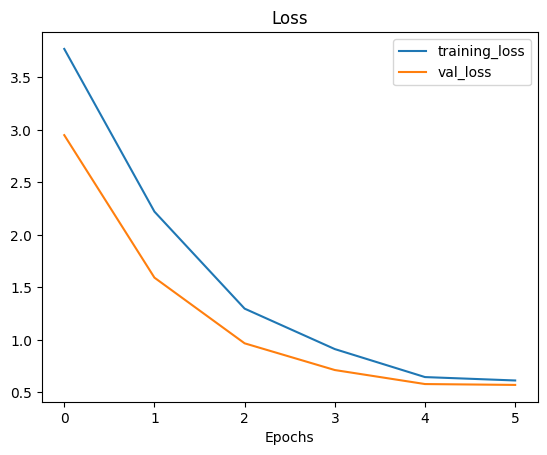

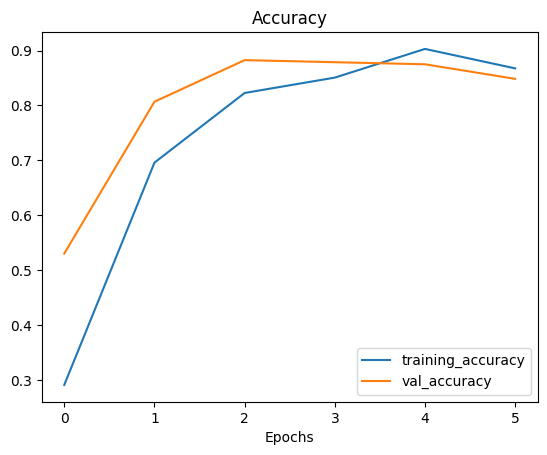

In [16]:
plot_loss_curves(hist_1)

In [17]:
model_1.evaluate(valid_data)

135/135 ━━━━━━━━━━━━━━━━━━━━ 54s 397ms/step - accuracy: 0.8669 - loss: 0.5376


[0.5123675465583801, 0.8842592835426331]

# Model_2 on augmented data

 The curves look great and at the end of the 5th epoch the curves touch each other, suggesting that if we trained for longer the model would start overfitting.

 Let's try to make the patterns harder for the model to learning by introducing data augmentation

In [18]:
IMG_SIZE = (224, 224)
SEED = 42
data_dir = '/content/animals/animals'
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    label_mode = 'categorical',
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = 8,
    subset = 'training'
)

valid_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    label_mode = 'categorical',
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = 8,
    subset = 'validation'
)

Found 5400 files belonging to 90 classes.
Using 4320 files for training.
Found 5400 files belonging to 90 classes.
Using 1080 files for validation.


In [19]:
# from tensorflow.keras.layers.experimental import preprocessing
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomZoom(0.2)
])

In [20]:
# Code to view the augmented image
def view_aug_image(dir):
  dir_path = os.path.join(dir, random.choice(os.listdir(dir)))
  animal = random.choice(os.listdir(dir_path))
  animal_path = os.path.join(dir_path, animal)
  img_path = os.path.join(animal_path, random.choice(os.listdir(animal_path)))
  img = mpimg.imread(img_path)

  aug_img = data_augmentation(img/255.)
  plt.figure(figsize=(10, 8))
  plt.subplot(1, 2, 1)
  plt.imshow(img)
  plt.title(f'Original: {animal}')
  plt.axis(False)
  plt.subplot(1, 2, 2)
  plt.imshow(aug_img)
  plt.title(f'Augmented: {animal}')
  plt.axis(False)
  plt.show()

In [21]:
# Load the EfficientNetV2B0 model without the top layer (classification head)
base_model = EfficientNetV2B0(
    include_top = False,
    input_shape = IMG_SIZE + (3,),
    weights='imagenet'
)

# Freeze the base model
base_model.trainable = False

# Define the input layer
inputs = layers.Input(shape=IMG_SIZE + (3,), name='input_layer')

# Apply data augmentation
x = data_augmentation(inputs)

# Pass the augmented images through the base model
x = base_model(x, training=False)

# Add a global average pooling layer
x = layers.GlobalAveragePooling2D(name='gap_layer')(x)

# Add a dense layer for classification
num_classes = len(train_data.class_names)  # Ensure train_data is defined
outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(x)

# Create the model
model_2 = keras.Model(inputs, outputs)

# Compile the model
model_2.compile(
    loss=CategoricalCrossentropy(),
    optimizer=Adam(),
    metrics=['accuracy']
)

# Print model summary to check the architecture
model_2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b0 (Functional)       │ (None, None, None, 1280)    │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gap_layer (GlobalAveragePooling2D)   │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 90)                  │         115,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,034,602 (23.02 MB)

 Trainable params: 115,290 (450.35 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

In [22]:
# Creating a model checkpoint callback
checkpoint_path = 'air_model_checkpoints/checkpoint2.weights.h5'

# This saves the model's weights only
checkpoint2 = keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_path, save_weights_only=True, save_best_only=False, save_freq='epoch', verbose=1
)

hist_2 = model_2.fit(
    train_data,
    epochs = 6,
    steps_per_epoch = len(train_data) // 8,
    validation_data = valid_data,
    validation_steps = int(0.25 * len(valid_data)),
    callbacks = [create_tensorboard_callback(dir_name='transfer_learning', experiment_name='10_feature_extraction_aug'), checkpoint2]
)

Saving TensorBoard log files to: transfer_learning/10_feature_extraction_aug/20240821-202219
Epoch 1/6
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.0974 - loss: 4.3285
Epoch 1: saving model to air_model_checkpoints/checkpoint2.weights.h5
67/67 ━━━━━━━━━━━━━━━━━━━━ 65s 751ms/step - accuracy: 0.0989 - loss: 4.3242 - val_accuracy: 0.5076 - val_loss: 3.1299
Epoch 2/6
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.4314 - loss: 3.0312
Epoch 2: saving model to air_model_checkpoints/checkpoint2.weights.h5
67/67 ━━━━━━━━━━━━━━━━━━━━ 46s 692ms/step - accuracy: 0.4326 - loss: 3.0268 - val_accuracy: 0.7652 - val_loss: 2.0050
Epoch 3/6
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - accuracy: 0.6214 - loss: 2.0626
Epoch 3: saving model to air_model_checkpoints/checkpoint2.weights.h5
67/67 ━━━━━━━━━━━━━━━━━━━━ 45s 678ms/step - accuracy: 0.6214 - loss: 2.0612 - val_accuracy: 0.8220 - val_loss: 1.4347
Epoch 4/6
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.6741 - loss: 1.6292
Epo

In [23]:
tf.__version__

'2.17.0'

In [24]:
IMG_SIZE + (3,)

(224, 224, 3)

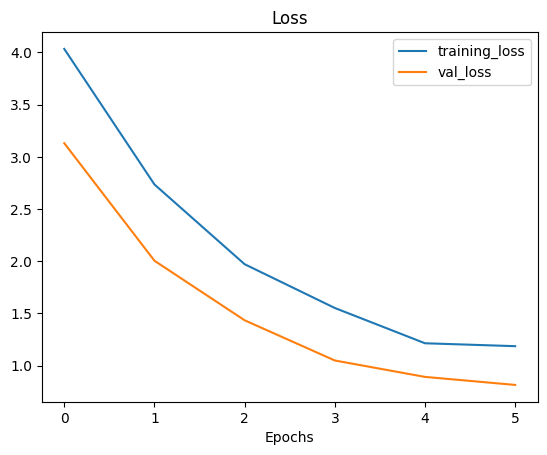

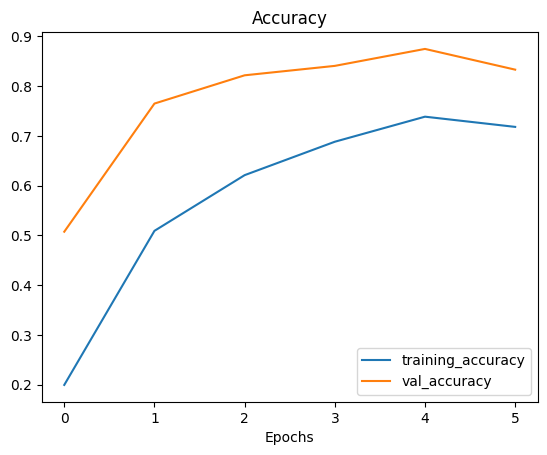

In [25]:
plot_loss_curves(hist_2)

In [26]:
model_2.evaluate(valid_data)

135/135 ━━━━━━━━━━━━━━━━━━━━ 53s 391ms/step - accuracy: 0.8534 - loss: 0.7783


[0.7635385990142822, 0.8611111044883728]

## Model_3. Fine tuning the transfer learning model_1

So with data augmentation the model_2 perfomed worse than expected, that is than the model_1 which did not have data augmentation

Let's us now experiment and figure out whether the outcome will be the same when we fine tune

In [27]:
# Reload all the data
IMG_SIZE = (224, 224)
SEED = 42
data_dir = '/content/animals/animals'
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    label_mode = 'categorical',
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = 8,
    subset = 'training'
)

valid_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    label_mode = 'categorical',
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = 8,
    subset = 'validation'
)

Found 5400 files belonging to 90 classes.
Using 4320 files for training.
Found 5400 files belonging to 90 classes.
Using 1080 files for validation.


In [28]:
# Reload the saved weights
model_1.load_weights('/content/air_model_checkpoints/checkpoint1.weights.h5')

In [29]:
base_model = EfficientNetV2B0(
    include_top=False,
    weights='imagenet',
    input_shape = IMG_SIZE + (3,)
)

# Make all layers non-trainable
for layer in base_model.layers:
    layer.trainable = False

# List the layers to be trained
trainable_layers = base_model.layers[-10:]

# Set the last ten layers to be trainable
for layer in trainable_layers:
    layer.trainable = True

inputs = layers.Input(shape=IMG_SIZE + (3,), name='input_layer')

# passing the inputs to the base model
x = base_model(inputs)

# Using GlobalAveragePooling to get the feature vector
x = layers.GlobalAveragePooling2D(name='gap_layer')(x)

# Create the output layer
outputs = layers.Dense(len(train_data.class_names), activation='softmax', name='output_layer')(x)

# pass the input and outputs to the model
model_1 = keras.Model(inputs, outputs)

model_1.compile(
    loss = CategoricalCrossentropy(),
    optimizer = Adam(),
    metrics = ['accuracy']
)

In [30]:
# Check to see the traiable layers now
for i, layer in enumerate(model_1.layers[1].layers):
  print(i, layer.name, layer.trainable)

0 input_layer_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dw

In [31]:
# are these layers trainable?
for layer in model_1.layers:
  print(layer, layer.trainable)

<InputLayer name=input_layer, built=True> True
<Functional name=efficientnetv2-b0, built=True> True
<GlobalAveragePooling2D name=gap_layer, built=True> True
<Dense name=output_layer, built=True> True


In [32]:
# Now we have made all final layers to be trainable, now we can fit from the previous epoch
hist_3 = model_1.fit(
    train_data,
    epochs= 20,
    steps_per_epoch = len(train_data) // 8,
    validation_data = valid_data,
    validation_steps = int(0.25 * len(valid_data)),
    initial_epoch = hist_1.epoch[-1], # Start training from previous last epoch
    callbacks = [create_tensorboard_callback(dir_name="transfer_learning", experiment_name='air_model_1_fine_tuning')]
)

Saving TensorBoard log files to: transfer_learning/air_model_1_fine_tuning/20240821-202921
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 62s 693ms/step - accuracy: 0.2022 - loss: 3.9836 - val_accuracy: 0.6553 - val_loss: 1.7614
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 42s 626ms/step - accuracy: 0.7120 - loss: 1.6798 - val_accuracy: 0.8220 - val_loss: 0.6332
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 42s 630ms/step - accuracy: 0.7820 - loss: 0.8285 - val_accuracy: 0.8864 - val_loss: 0.4109
Epoch 9/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 42s 629ms/step - accuracy: 0.8384 - loss: 0.6311 - val_accuracy: 0.8826 - val_loss: 0.4341
Epoch 10/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 30s 452ms/step - accuracy: 0.8989 - loss: 0.4738 - val_accuracy: 0.8750 - val_loss: 0.3596
Epoch 11/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 42s 628ms/step - accuracy: 0.8662 - loss: 0.5103 - val_accuracy: 0.8409 - val_loss: 0.5060
Epoch 12/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 42s 627ms/step - accuracy: 0.8850 - loss: 0.4566 - val_accuracy: 0.8902 - val_loss: 0.3853
Epo

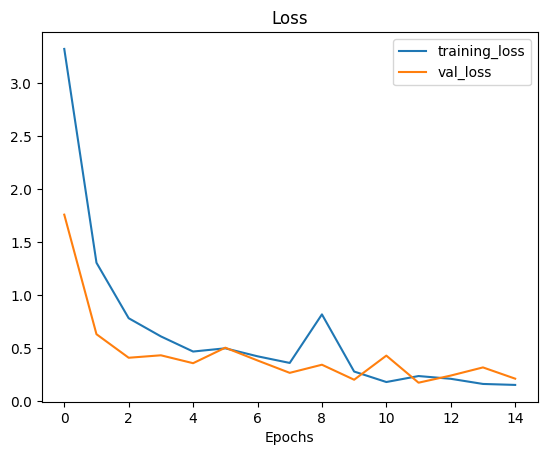

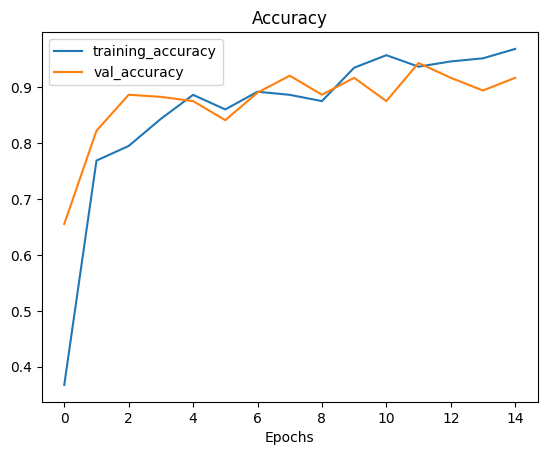

In [33]:
plot_loss_curves(hist_3)

In [34]:
model_1.evaluate(valid_data)

135/135 ━━━━━━━━━━━━━━━━━━━━ 53s 387ms/step - accuracy: 0.8749 - loss: 0.3517


[0.2950168251991272, 0.895370364189148]

As we can see after fine tuning the model accuracy has increased and the loss has reduced compared to the feature extractor

## Model_4 Fine tune on augmented data

In [35]:
# Get the data again
IMG_SIZE = (224, 224)
SEED = 42
data_dir = '/content/animals/animals'
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    label_mode = 'categorical',
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = 8,
    subset = 'training'
)

valid_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    label_mode = 'categorical',
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = 8,
    subset = 'validation'
)

Found 5400 files belonging to 90 classes.
Using 4320 files for training.
Found 5400 files belonging to 90 classes.
Using 1080 files for validation.


In [36]:
model_2.load_weights('/content/air_model_checkpoints/checkpoint2.weights.h5')

In [37]:
# Load the EfficientNetV2B0 model without the top layer (classification head)
base_model = EfficientNetV2B0(
    include_top = False,
    input_shape = IMG_SIZE + (3,),
    weights='imagenet'
)

# Make all layers non-trainable
for layer in base_model.layers:
    layer.trainable = False

# List the layers to be trained
trainable_layers = base_model.layers[-10:]

# Set the last ten layers to be trainable
for layer in trainable_layers:
    layer.trainable = True


# Define the input layer
inputs = layers.Input(shape=IMG_SIZE + (3,), name='input_layer')

# Apply data augmentation
x = data_augmentation(inputs)

# Pass the augmented images through the base model
x = base_model(x, training=False)

# Add a global average pooling layer
x = layers.GlobalAveragePooling2D(name='gap_layer')(x)

# Add a dense layer for classification
num_classes = len(train_data.class_names)  # Ensure train_data is defined
outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(x)

# Create the model
model_2 = keras.Model(inputs, outputs)

# Compile the model
model_2.compile(
    loss=CategoricalCrossentropy(),
    optimizer=Adam(),
    metrics=['accuracy']
)

# Print model summary to check the architecture
model_2.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b0 (Functional)       │ (None, None, None, 1280)    │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gap_layer (GlobalAveragePooling2D)   │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 90)                  │         115,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,034,602 (23.02 MB)

 Trainable params: 696,970 (2.66 MB)

 Non-trainable params: 5,337,632 (20.36 MB)

In [38]:
# Now we have made all final layers to be trainable, now we can fit from the previous epoch
hist_4 = model_2.fit(
    train_data,
    epochs= 20,
    steps_per_epoch = len(train_data) // 8,
    validation_data = valid_data,
    validation_steps = int(0.25 * len(valid_data)),
    initial_epoch = hist_2.epoch[-1], # Start training from previous last epoch
    callbacks = [create_tensorboard_callback(dir_name="transfer_learning", experiment_name='air_model_2_fine_tuning')]
)

Saving TensorBoard log files to: transfer_learning/air_model_2_fine_tuning/20240821-204041
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 69s 788ms/step - accuracy: 0.1395 - loss: 4.1592 - val_accuracy: 0.5530 - val_loss: 2.1794
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 48s 717ms/step - accuracy: 0.4845 - loss: 2.5228 - val_accuracy: 0.7235 - val_loss: 0.8629
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 51s 763ms/step - accuracy: 0.6327 - loss: 1.5927 - val_accuracy: 0.8447 - val_loss: 0.5965
Epoch 9/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 50s 751ms/step - accuracy: 0.6721 - loss: 1.3502 - val_accuracy: 0.8598 - val_loss: 0.4534
Epoch 10/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 36s 533ms/step - accuracy: 0.7548 - loss: 1.0261 - val_accuracy: 0.8750 - val_loss: 0.4048
Epoch 11/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 49s 726ms/step - accuracy: 0.7028 - loss: 1.0664 - val_accuracy: 0.8295 - val_loss: 0.5968
Epoch 12/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 49s 742ms/step - accuracy: 0.8015 - loss: 0.8718 - val_accuracy: 0.8902 - val_loss: 0.4203
Epo

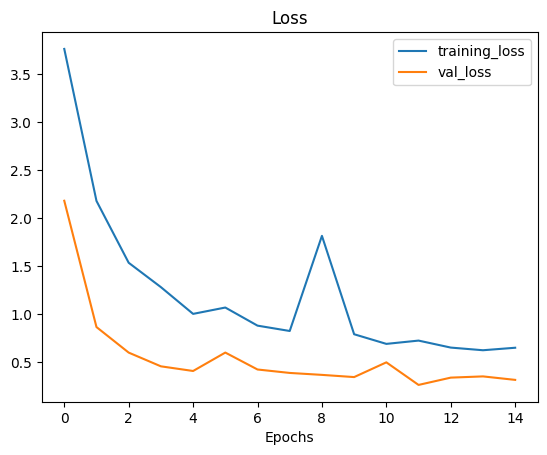

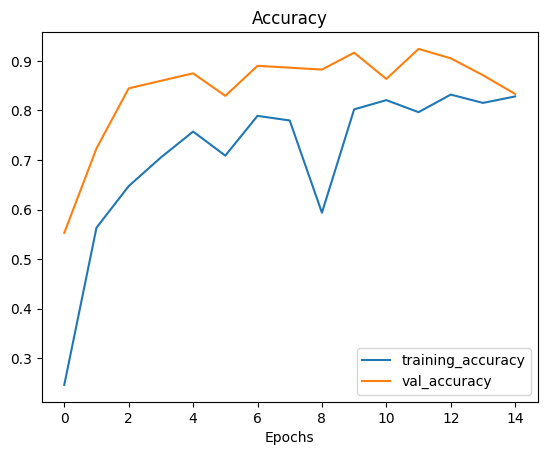

In [39]:
plot_loss_curves(hist_4)

In [40]:
model_2.evaluate(valid_data)

135/135 ━━━━━━━━━━━━━━━━━━━━ 52s 386ms/step - accuracy: 0.8737 - loss: 0.4286


[0.35217761993408203, 0.8870370388031006]

In [41]:
def compare_histories(history_1, history_2):
  loss_1 = history_1.history['loss']
  total_loss = loss_1 + history_2.history['loss']
  acc_1 = history_1.history['accuracy']
  total_acc = acc_1 + history_2.history['accuracy']
  val_loss_1 = history_1.history['val_loss']
  total_val_loss = val_loss_1 + history_2.history['val_loss']
  val_acc_1 = history_1.history['val_accuracy']
  total_val_acc = val_acc_1 + history_2.history['val_accuracy']
  total_epochs = range(len(history_1.history['loss']) + len(history_2.history['loss']))
  plt.figure(figsize=(20, 8))
  plt.subplot(1, 2, 1)
  plt.plot(total_acc, label='training_accuracy')
  plt.plot(total_val_acc, label='fine_tune_validation_accuracy')
  plt.plot([6-1, 6-1], plt.ylim(), label='Start_fine_tuning')
  plt.title(f"Original")
  plt.xlabel("epochs")
  plt.ylabel('Loss')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(total_loss, label='training_loss')
  plt.plot(total_val_loss, label='fine_tune_validation_loss')
  plt.plot([6-1, 6-1], plt.ylim(), label='Start_fine_tuning')
  plt.title(f"Fine Tuned")
  plt.xlabel("epochs")
  plt.ylabel('Loss')

  plt.show()


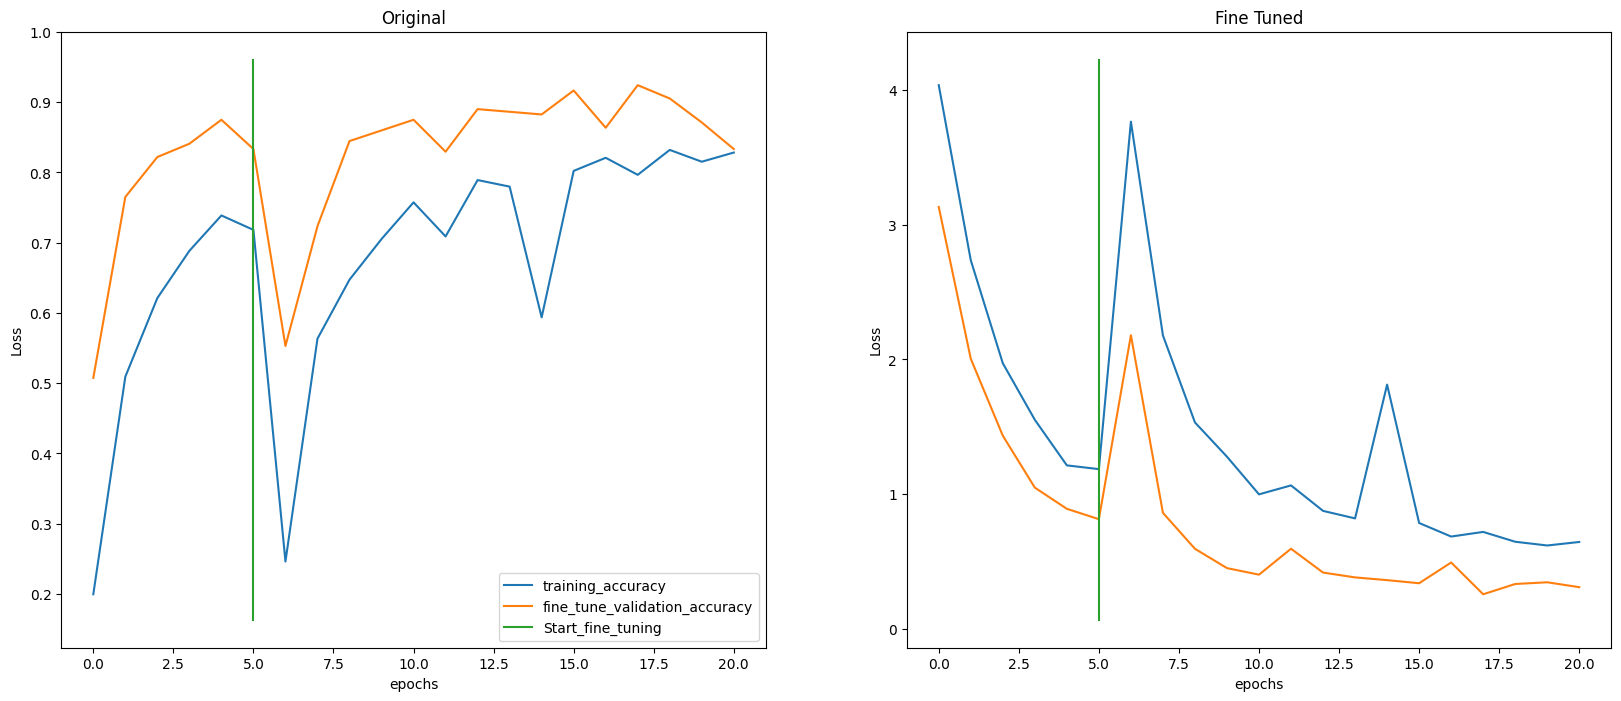

In [42]:
compare_histories(hist_2, hist_4)

In [43]:
model_2.save('AIR_Aug.keras')
model_1.save('AIR.keras')

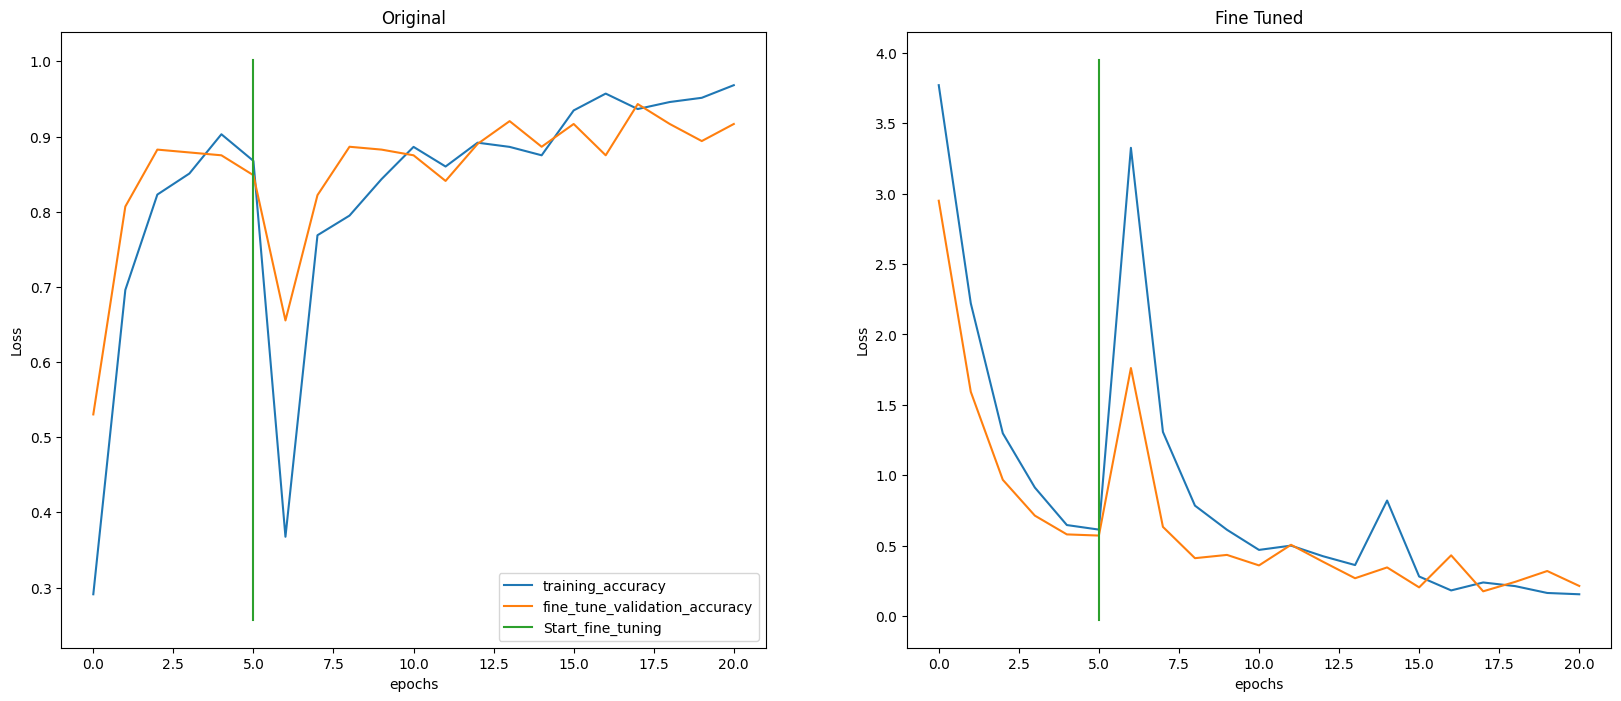

In [44]:
compare_histories(hist_1, hist_3)

In [45]:
model_2.evaluate(valid_data)

135/135 ━━━━━━━━━━━━━━━━━━━━ 53s 393ms/step - accuracy: 0.8824 - loss: 0.3976


[0.3521776497364044, 0.8870370388031006]

In [46]:
model_1.evaluate(valid_data)

135/135 ━━━━━━━━━━━━━━━━━━━━ 52s 386ms/step - accuracy: 0.8829 - loss: 0.3384


[0.29501691460609436, 0.895370364189148]

# Model 1 which is trained on non-augmented data seems to be perfoming better

In [78]:

def preprocess_image(image_path, img_shape):
    # Read and preprocess the image
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    img = tf.image.resize(img, size=[img_shape, img_shape])
    img = tf.expand_dims(img, axis=0)  # Add batch dimension
    return img

In [100]:
def make_prediction(filename, model=model_1, img_shape=224, class_names=train_data.class_names):
    # Read the image file
    dir_path = os.path.join(filename, random.choice(os.listdir(filename)))
    animal = random.choice(os.listdir(dir_path))
    animal_path = os.path.join(dir_path, animal)
    img_path = os.path.join(animal_path, random.choice(os.listdir(animal_path)))
    img = tf.io.read_file(img_path)

    # Decode the image into a tensor
    img = tf.image.decode_image(img, channels=3)  # Ensure 3 channels (RGB)

    # Resize the image to the expected input shape
    img = tf.image.resize(img, size=[img_shape, img_shape])

    # Rescale the image to [0, 1]
    img_1 = img / 255.0

    # Expand dimensions to fit model input
    img = tf.expand_dims(img, axis=0)

    # Make prediction
    preds = model.predict(img)

    # Print predictions for debugging
    # print("Predictions:", preds)

    # Get the class index with the highest probability
    predicted_class_index = tf.argmax(preds[0])

    # Map the class index to class name
    if class_names is not None:
        value = class_names[predicted_class_index]
    else:
        value = predicted_class_index.numpy()

    plt.imshow(img_1)
    plt.title(f'pred: {value} True {animal}')
    plt.axis(False)
    plt.show()

    return value


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


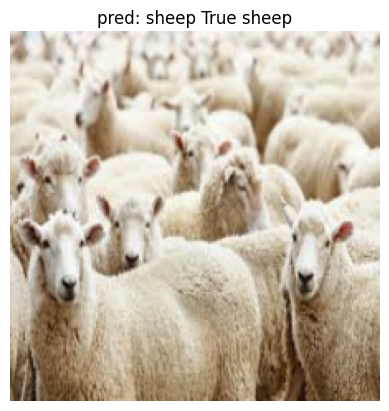

In [114]:
img_path = '/content/animals'
value = make_prediction(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


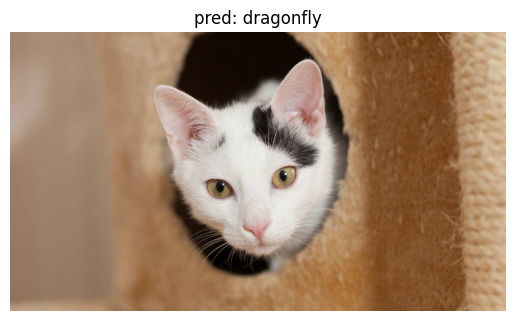

In [51]:
img_path = '/content/animals/animals/cat/00357563a7.jpg'
img = mpimg.imread(img_path)
pred = nn.predict(tf.expand_dims(tf.image.resize(img/255., size=(224, 224)), axis=0))
plt.imshow(img)
plt.title(f'pred: {train_data.class_names[tf.argmax(pred[0])]}')
plt.axis(False)
plt.show()

In [115]:
train_data.class_names

['antelope',
 'badger',
 'bat',
 'bear',
 'bee',
 'beetle',
 'bison',
 'boar',
 'butterfly',
 'cat',
 'caterpillar',
 'chimpanzee',
 'cockroach',
 'cow',
 'coyote',
 'crab',
 'crow',
 'deer',
 'dog',
 'dolphin',
 'donkey',
 'dragonfly',
 'duck',
 'eagle',
 'elephant',
 'flamingo',
 'fly',
 'fox',
 'goat',
 'goldfish',
 'goose',
 'gorilla',
 'grasshopper',
 'hamster',
 'hare',
 'hedgehog',
 'hippopotamus',
 'hornbill',
 'horse',
 'hummingbird',
 'hyena',
 'jellyfish',
 'kangaroo',
 'koala',
 'ladybugs',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'mosquito',
 'moth',
 'mouse',
 'octopus',
 'okapi',
 'orangutan',
 'otter',
 'owl',
 'ox',
 'oyster',
 'panda',
 'parrot',
 'pelecaniformes',
 'penguin',
 'pig',
 'pigeon',
 'porcupine',
 'possum',
 'raccoon',
 'rat',
 'reindeer',
 'rhinoceros',
 'sandpiper',
 'seahorse',
 'seal',
 'shark',
 'sheep',
 'snake',
 'sparrow',
 'squid',
 'squirrel',
 'starfish',
 'swan',
 'tiger',
 'turkey',
 'turtle',
 'whale',
 'wolf',
 'wombat',
 'woodpecker',
